# AR6 WG1 - SPM.8

This notebook reproduces parts of **Figure SPM.8** of the IPCC's *Working Group I contribution to the Sixth Assessment Report* ([AR6 WG1](https://www.ipcc.ch/assessment-report/ar6/)).

The data supporting the SPM figure is published under a Creative Commons CC-BY license at 
the [Centre for Environmental Data Analyis (CEDA)](https://catalogue.ceda.ac.uk/uuid/ae4f1eb6fce24adcb92ddca1a7838a5c).

This notebook uses a version of that data which was processed for interoperability with the format used by IPCC WG3, the so-called IAMC format.  
The notebook is available under an open-source [BSD-3 License](https://github.com/openscm/AR6-WG1-Data-Compilation/blob/main/LICENSE) in the [openscm/AR6-WG1-Data-Compilation](https://github.com/openscm/AR6-WG1-Data-Compilation) GitHub repository.

The notebook uses the community Python package [scmdata](https://scmdata.readthedocs.io), which is designed to handle simple climate model data but generalises to handle all sorts of timeseries-based data including data in the IAMC format. While it is primarily a data handling package and not a plotting package, scmdata does offer some convenient plotting functions which we use in these notebooks alongside [seaborn](https://seaborn.pydata.org) and native [matplotlib](https://matplotlib.org/) as required.

In [1]:
import matplotlib.pyplot as plt
import pyam
import scmdata
import yaml

import utils

<IPython.core.display.Javascript object>

In [2]:
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
with open("plotting.yaml") as fh:
    palette = yaml.safe_load(fh)["color"]["scenario"]
    
palette = {k: pyam.plotting.PYAM_COLORS[v] for k, v in palette.items()}
palette["historical"] = "black"
palette

{'SSP1-1.9': '#00a9cf',
 'SSP1-2.6': '#003466',
 'SSP2-4.5': '#f69320',
 'SSP3-7.0': '#df0000',
 'SSP5-8.5': '#980002',
 'historical': 'black'}

In [4]:
input_file = utils.DATA_DIR / "processed" / "fig-spm8" / "fig-spm8-timeseries.csv"
input_file

PosixPath('/Users/znicholls/Documents/AGCEC/MCastle/ar6-wg1-data-compilation/data/processed/fig-spm8/fig-spm8-timeseries.csv')

In [5]:
data = scmdata.ScmRun(str(input_file))
data.head()

time                                                                                                                            1950-01-01  \
model         reference_period_end_year reference_period_start_year region scenario   unit variable                                          
Ch.4 Assessed 1900.0                    1850.0                      World  SSP2-4.5   K    Surface Air Temperature Change|5%           NaN   
                                                                                           Surface Air Temperature Change|95%          NaN   
                                                                                           Surface Air Temperature Change|Mean         NaN   
                                                                           historical K    Surface Air Temperature Change|5%     -0.060030   
                                                                                           Surface Air Temperature Change|95%     0.608546   

time                                                                                                                            1951-01-01  \
model         reference_period_end_year reference_period_start_year region scenario   unit variable                                          
Ch.4 Assessed 1900.0                    1850.0                      World  SSP2-4.5   K    Surface Air Temperature Change|5%           NaN   
                                                                                           Surface Air Temperature Change|95%          NaN   
                                                                                           Surface Air Temperature Change|Mean         NaN   
                                                                           historical K    Surface Air Temperature Change|5%     -0.055686   
                                                                                           Surface Air Temperature Change|95%     0.525308   

time                                                                                                                            1952-01-01  \
model         reference_period_end_year reference_period_start_year region scenario   unit variable                                          
Ch.4 Assessed 1900.0                    1850.0                      World  SSP2-4.5   K    Surface Air Temperature Change|5%           NaN   
                                                                                           Surface Air Temperature Change|95%          NaN   
                                                                                           Surface Air Temperature Change|Mean         NaN   
                                                                           historical K    Surface Air Temperature Change|5%     -0.042891   
                                                                                           Surface Air Temperature Change|95%     0.540725   

time                                                                                                                            1953-01-01  \
model         reference_period_end_year reference_period_start_year region scenario   unit variable                                          
Ch.4 Assessed 1900.0                    1850.0                      World  SSP2-4.5   K    Surface Air Temperature Change|5%           NaN   
                                                                                           Surface Air Temperature Change|95%          NaN   
                                                                                           Surface Air Temperature Change|Mean         NaN   
                                                                           historical K    Surface Air Temperature Change|5%     -0.020530   
                                                                                           Surface Air Temperature Change|95%     0.535419   

time                

In [6]:
# the output format would work nicely with pyam, openscm prefers
# variables to not contain stats ids (for example)
data_unmangled = utils.unmangle_stats(data)
data_unmangled["quantile"] = data_unmangled["statistic"].apply(utils.convert_stats_to_quantile)
data_unmangled.head()

time                                                                                                                                          1950-01-01  \
model         quantile reference_period_end_year reference_period_start_year region scenario   statistic unit variable                                     
Ch.4 Assessed 0.05     1900.0                    1850.0                      World  SSP2-4.5   5%        K    Surface Air Temperature Change         NaN   
              0.95     1900.0                    1850.0                      World  SSP2-4.5   95%       K    Surface Air Temperature Change         NaN   
              0.50     1900.0                    1850.0                      World  SSP2-4.5   Mean      K    Surface Air Temperature Change         NaN   
              0.05     1900.0                    1850.0                      World  historical 5%        K    Surface Air Temperature Change   -0.060030   
              0.95     1900.0                    1850.0                      World  historical 95%       K    Surface Air Temperature Change    0.608546   

time                                                                                                                                          1951-01-01  \
model         quantile reference_period_end_year reference_period_start_year region scenario   statistic unit variable                                     
Ch.4 Assessed 0.05     1900.0                    1850.0                      World  SSP2-4.5   5%        K    Surface Air Temperature Change         NaN   
              0.95     1900.0                    1850.0                      World  SSP2-4.5   95%       K    Surface Air Temperature Change         NaN   
              0.50     1900.0                    1850.0                      World  SSP2-4.5   Mean      K    Surface Air Temperature Change         NaN   
              0.05     1900.0                    1850.0                      World  historical 5%        K    Surface Air Temperature Change   -0.055686   
              0.95     1900.0                    1850.0                      World  historical 95%       K    Surface Air Temperature Change    0.525308   

time                                                                                                                                          1952-01-01  \
model         quantile reference_period_end_year reference_period_start_year region scenario   statistic unit variable                                     
Ch.4 Assessed 0.05     1900.0                    1850.0                      World  SSP2-4.5   5%        K    Surface Air Temperature Change         NaN   
              0.95     1900.0                    1850.0                      World  SSP2-4.5   95%       K    Surface Air Temperature Change         NaN   
              0.50     1900.0                    1850.0                      World  SSP2-4.5   Mean      K    Surface Air Temperature Change         NaN   
              0.05     1900.0                    1850.0                      World  historical 5%        K    Surface Air Temperature Change   -0.042891   
              0.95     1900.0                    1850.0                      World  historical 95%       K    Surface Air Temperature Change    0.540725   

time                                                                                                                                          1953-01-01  \
model         quantile reference_period_end_year reference_period_start_year region scenario   statistic unit variable                                     
Ch.4 Assessed 0.05     1900.0                    1850.0                      World  SSP2-4.5   5%        K    Surface Air Temperature Change         NaN   
              0.95     1900.0                    1850.0                      World  SSP2-4.5   95%       K    Surface Air Temperature Change         NaN   
              0.50     1900.0                    1850.0                      World  SSP2-4.5   Me

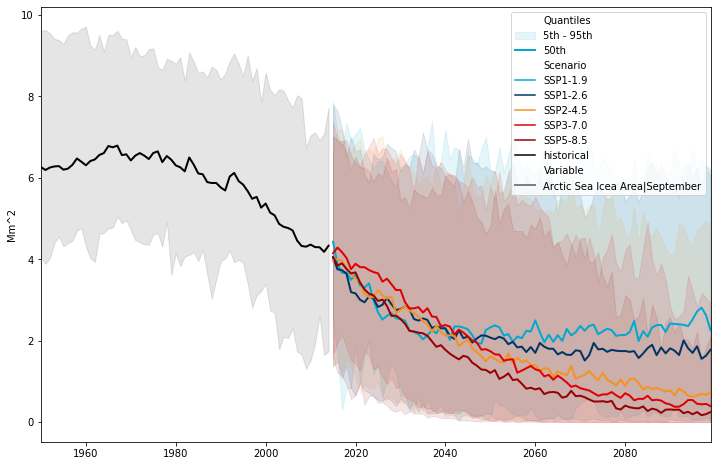

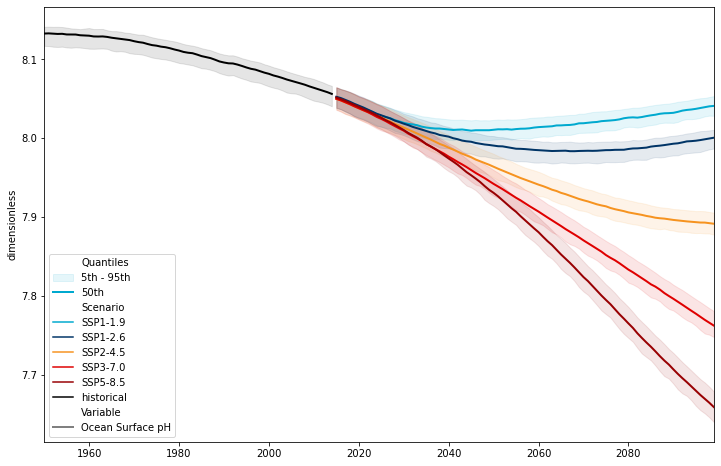

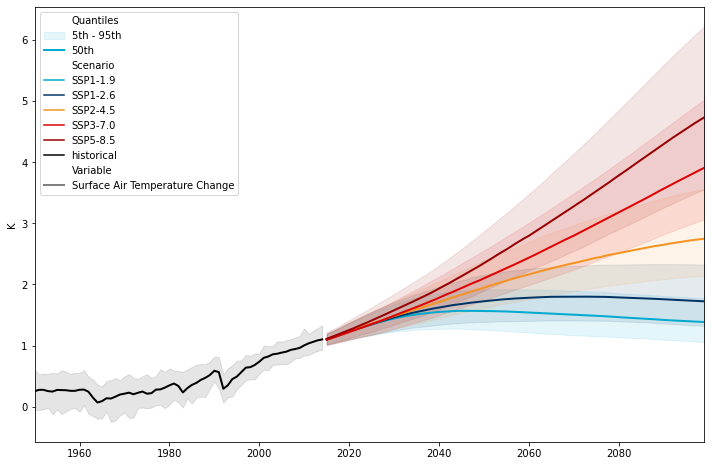

In [7]:
for vdf in data_unmangled.groupby("variable"):
    vdf.plumeplot(
        hue_var="scenario", hue_label="Scenario", palette=palette, pre_calculated=True,
        quantiles_plumes=[((0.05, 0.95), 0.1), ((0.5,), 1.0)],
    )
    plt.show()